In [1]:
import requests
import os
from datetime import datetime
import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
from dotenv import load_dotenv


In [2]:
load_dotenv()
API_KEY = os.getenv("HERE_API_KEY")

In [3]:
lat = 30.735567
lon = 76.775714
radius = 1000
url = f"https://data.traffic.hereapi.com/v7/flow?locationReferencing=shape&in=circle:{lat},{lon};r={radius}&apiKey={API_KEY}"

In [4]:
response = requests.get(url)
time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")  

In [5]:
data = response.json()

os.makedirs("traffic_data", exist_ok=True)
with open(f'traffic_data/{time}.json', 'w') as f:
    json.dump(response.json(), f, indent=4)

## Plotting roads hopefully

In [7]:
with open("traffic_data/2025-03-09_16-41-08.json", 'r') as f:
    data = json.load(f)

In [8]:
x = []
y = []

for location in data['results']:
    links = location['location']['shape']['links']
    for link in links:
        points = link['points']
        for point in points:
            x.append(point['lat'])
            y.append(point['lng'])

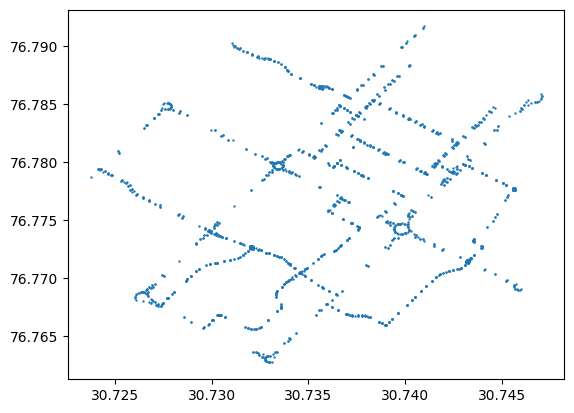

In [9]:
plt.scatter(x, y, s=0.5)

# Figuring out speeds

In [28]:
fpath = "traffic_data/2025-03-09_16-41-08.json"
with open(fpath, "r") as file:
    data = json.load(file)

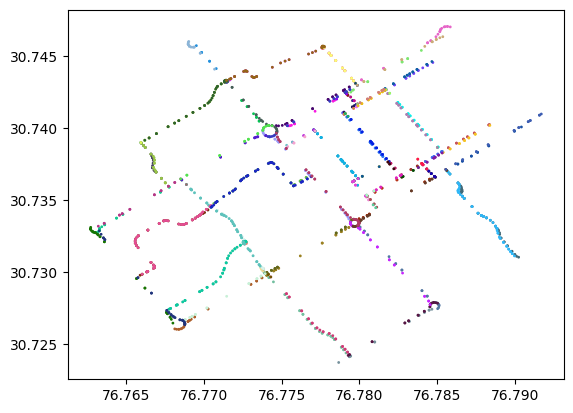

In [29]:
x = []
y = []
clr = []
for i, location in enumerate(data['results']):
    links = location['location']['shape']['links']
    color = (random.random(), random.random(), random.random(), 1)
    for link in links:
        for point in link['points']:
            x.append(point['lat'])
            y.append(point['lng'])
            clr.append(color)

plt.scatter(y, x, c=clr, s=1)    

In [30]:
speed = []
jamFactor = []
freeFlow = []

for location in data['results']:
    flow = location['currentFlow']
    speed.append(flow['speedUncapped'])
    freeFlow.append(flow['freeFlow'])
    jamFactor.append(flow['jamFactor'])

In [31]:
print(max(speed))

13.055556


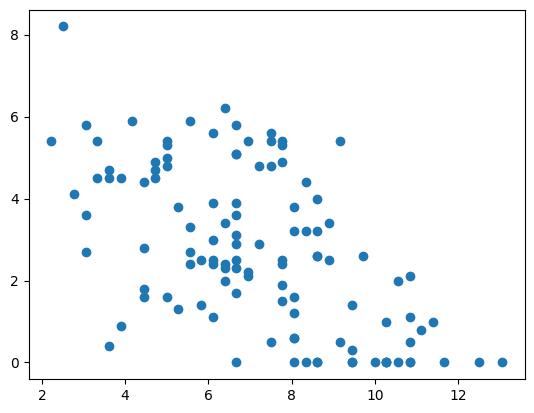

In [32]:
plt.scatter(speed, jamFactor)

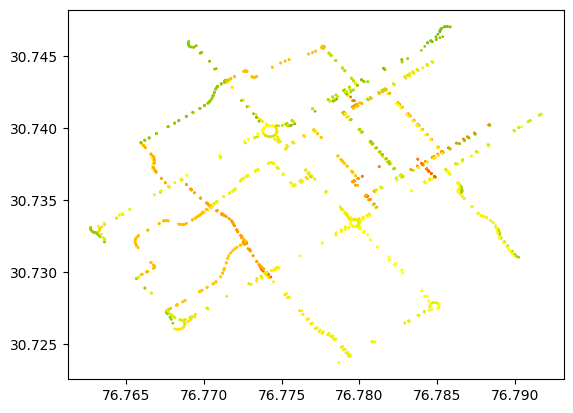

In [21]:
cmap = mcolors.LinearSegmentedColormap.from_list("red_green",["red","yellow","green"])
norm = mcolors.Normalize(vmin=0, vmax=15)

x = []
y = []
clr = []
for i, location in enumerate(data['results']):
    links = location['location']['shape']['links']
    color = cmap(norm(location['currentFlow']['speed']))
    for link in links:
        for point in link['points']:
            x.append(point['lat'])
            y.append(point['lng'])
            clr.append(color)

plt.scatter(y, x, c=clr, s=1)
plt.show()

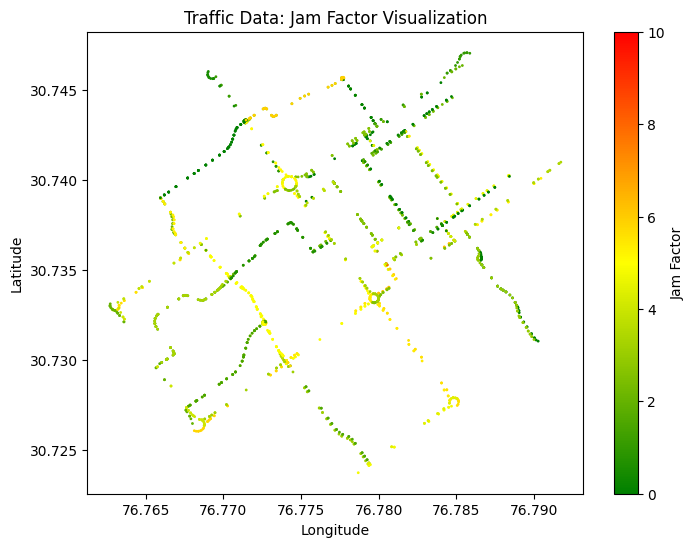

In [26]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a custom colormap: green for low jam, red for high jam
cmap = mcolors.LinearSegmentedColormap.from_list("green_red", ["green", "yellow", "red"])
norm = mcolors.Normalize(vmin=0, vmax=10)

# Example data variable 'data' should be defined (loaded from your JSON)
# For this snippet, we assume 'data' is already available.
x = []
y = []
clr = []
for i, location in enumerate(data['results']):
    links = location['location']['shape']['links']
    jam_factor = location['currentFlow']['jamFactor']
    color = cmap(norm(jam_factor))
    for link in links:
        for point in link['points']:
            x.append(point['lat'])
            y.append(point['lng'])
            clr.append(color)

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(y, x, c=clr, s=1)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Traffic Data: Jam Factor Visualization")

# Create a ScalarMappable and add a colorbar to the axes
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is needed for the colorbar to work properly
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Jam Factor")

plt.show()


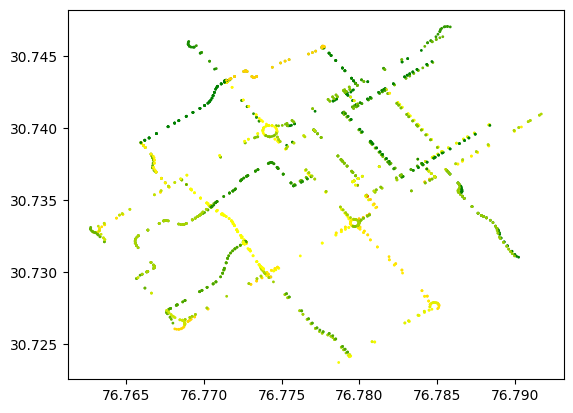

In [24]:
plt.scatter(y, x, c=clr, s=1)
plt.show()